# Backtracking

In [1]:
from time import time

from tp3.archivos import leer_archivo
from tp3.algoritmos import *

def test_backtracking(file):
    deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_backtracking(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [2]:
soluciones_backtracking = []
for numero_archivo in range(10, 80, 10):
    solucion, tiempo = test_backtracking(f"../notebooks/{numero_archivo}.txt")
    soluciones_backtracking.append((numero_archivo, tiempo))

Start for ../notebooks/10.txt
End: 0.005013704299926758 s.
SOLUCION ----> ['Jugador_35', 'Jugador_22', 'Jugador_12', 'Jugador_10']  ( 4 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/20.txt
End: 0.13326311111450195 s.
SOLUCION ----> ['Jugador_13', 'Jugador_27', 'Jugador_46', 'Jugador_33', 'Jugador_11', 'Jugador_3']  ( 6 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/30.txt
End: 1.6746788024902344 s.
SOLUCION ----> ['Jugador_29', 'Jugador_3', 'Jugador_45', 'Jugador_43', 'Jugador_16', 'Jugador_18', 'Jugador_15']  ( 7 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/40.txt
End: 34.099666595458984 s.
SOLUCION ----> ['Jugador_2', 'Jugador_0', 'Jugador_32', 'Jugador_4', 'Jugador_9', 'Jugador_34', 'Jugador_36', 'Jugador_40', 'Jugador_15']  ( 9 )
++++ ES VALIDA ++++
-----------------------------

# Programacion lineal

In [3]:
!pip install pulp


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from tp3.seleccion_jugadores import hitting_set_programacion_lineal

def test_programacion_lineal(file):
    deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_programacion_lineal(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [5]:
soluciones_programacion_lineal = []
for numero_archivo in range(100, 1100, 100):
    solucion, tiempo = test_programacion_lineal(f"../notebooks/{numero_archivo}.txt")
    soluciones_programacion_lineal.append((numero_archivo, tiempo))

Start for ../notebooks/100.txt
End: 0.1295795440673828 s.
SOLUCION ----> ['Jugador_41', 'Jugador_42', 'Jugador_4', 'Jugador_10', 'Jugador_24', 'Jugador_43', 'Jugador_30', 'Jugador_37', 'Jugador_2', 'Jugador_16', 'Jugador_45', 'Jugador_48', 'Jugador_6']  ( 13 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/200.txt
End: 0.8877742290496826 s.
SOLUCION ----> ['Jugador_29', 'Jugador_46', 'Jugador_41', 'Jugador_47', 'Jugador_1', 'Jugador_5', 'Jugador_42', 'Jugador_4', 'Jugador_30', 'Jugador_2', 'Jugador_45', 'Jugador_39', 'Jugador_31', 'Jugador_11', 'Jugador_36', 'Jugador_6']  ( 16 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/300.txt
End: 4.925328254699707 s.
SOLUCION ----> ['Jugador_0', 'Jugador_41', 'Jugador_47', 'Jugador_1', 'Jugador_25', 'Jugador_35', 'Jugador_44', 'Jugador_38', 'Jugador_24', 'Jugador_21', 'Jugador_15', 'Jugador_30', 'Jugador_40', 'Juga

# Algoritmo Bilardo

In [6]:
def test_aproximacion_bilardo(file):
    deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_aproximacion_bilardo(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [7]:
soluciones_aproximacion_bilardo = []
archivos = ["../examples/5.txt", "../examples/7.txt", "../examples/10_pocos.txt", "../examples/10_varios.txt", "../examples/10_todos.txt",
            "../examples/15.txt", "../examples/20.txt", "../examples/50.txt", "../examples/75.txt", "../examples/100.txt", "../examples/200.txt",
           "../notebooks/500.txt", "../notebooks/1000.txt", "../notebooks/2000.txt", "../notebooks/4000.txt", "../notebooks/8000.txt"]
for numero_archivo in range(1000, 51000, 1000):
    solucion, tiempo = test_aproximacion_bilardo(f"../notebooks/{numero_archivo}.txt")
    soluciones_aproximacion_bilardo.append((numero_archivo, tiempo))

Start for ../notebooks/1000.txt
End: 0.0660398006439209 s.
SOLUCION ----> ['Jugador_17', 'Jugador_29', 'Jugador_46', 'Jugador_0', 'Jugador_41', 'Jugador_47', 'Jugador_1', 'Jugador_5', 'Jugador_7', 'Jugador_42', 'Jugador_34', 'Jugador_35', 'Jugador_25', 'Jugador_44', 'Jugador_26', 'Jugador_4', 'Jugador_10', 'Jugador_38', 'Jugador_8', 'Jugador_24', 'Jugador_21', 'Jugador_15', 'Jugador_14', 'Jugador_49', 'Jugador_18', 'Jugador_43', 'Jugador_30', 'Jugador_40', 'Jugador_19', 'Jugador_32', 'Jugador_2', 'Jugador_37', 'Jugador_16', 'Jugador_27', 'Jugador_45', 'Jugador_33', 'Jugador_28', 'Jugador_22', 'Jugador_12', 'Jugador_39', 'Jugador_13', 'Jugador_3', 'Jugador_23', 'Jugador_9', 'Jugador_48', 'Jugador_31', 'Jugador_11', 'Jugador_36', 'Jugador_6', 'Jugador_20']  ( 50 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/2000.txt
End: 0.10688018798828125 s.
SOLUCION ----> ['Jugador_17', 'Jugador_29', 'Jugador_46', 'Jugador_0', 'Jugad

# Greedy

In [8]:
def test_greedy(file):
    deseos_prensa = leer_archivo(file)

    start = time()
    print("Start for", file)
    convocados = hitting_set_greedy(deseos_prensa)
    duration = time() - start
    print("End:", duration, "s.")
    
    print("SOLUCION ---->", convocados, " (", len(convocados), ")")
    if(es_hitting_set(deseos_prensa, convocados)):
        print("++++ ES VALIDA ++++")
    else:
        print("---- ES INVALIDA ----")
    print("---------------------------------------------------------------------")
    return convocados, duration

In [9]:
soluciones_greedy = []
archivos = ["../examples/5.txt", "../examples/7.txt", "../examples/10_pocos.txt", "../examples/10_varios.txt", "../examples/10_todos.txt",
            "../examples/15.txt", "../examples/20.txt", "../examples/50.txt", "../examples/75.txt", "../examples/100.txt", "../examples/200.txt",
           "../notebooks/500.txt", "../notebooks/1000.txt", "../notebooks/2000.txt", "../notebooks/4000.txt", "../notebooks/8000.txt"]
for numero_archivo in range(1000, 51000, 1000):
    solucion, tiempo = test_greedy(f"../notebooks/{numero_archivo}.txt")
    soluciones_greedy.append((numero_archivo, tiempo))

Start for ../notebooks/1000.txt
End: 0.011966943740844727 s.
SOLUCION ----> ['Jugador_43', 'Jugador_17', 'Jugador_4', 'Jugador_48', 'Jugador_26', 'Jugador_25', 'Jugador_29', 'Jugador_33', 'Jugador_13', 'Jugador_41', 'Jugador_38', 'Jugador_40', 'Jugador_2', 'Jugador_14', 'Jugador_44', 'Jugador_21', 'Jugador_24', 'Jugador_22', 'Jugador_45', 'Jugador_16', 'Jugador_0', 'Jugador_20', 'Jugador_42', 'Jugador_3', 'Jugador_11', 'Jugador_28', 'Jugador_18']  ( 27 )
++++ ES VALIDA ++++
---------------------------------------------------------------------
Start for ../notebooks/2000.txt
End: 0.026442289352416992 s.
SOLUCION ----> ['Jugador_33', 'Jugador_31', 'Jugador_43', 'Jugador_3', 'Jugador_11', 'Jugador_36', 'Jugador_22', 'Jugador_35', 'Jugador_29', 'Jugador_34', 'Jugador_4', 'Jugador_9', 'Jugador_30', 'Jugador_13', 'Jugador_20', 'Jugador_38', 'Jugador_28', 'Jugador_10', 'Jugador_14', 'Jugador_8', 'Jugador_0', 'Jugador_41', 'Jugador_37', 'Jugador_49', 'Jugador_21', 'Jugador_2', 'Jugador_26', 'J

In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import matplotlib.pyplot as plt

def plot_resultados(resultados):
    deseos = [resultado[0] for resultado in resultados]
    tiempos = [resultado[1] for resultado in resultados]
    
    plt.plot(deseos, tiempos, label= "Tiempo segun cantidad de deseos",  marker='o', linestyle='-')
    plt.xlabel('Deseos')
    plt.ylabel('Tiempo (s)')
    plt.title('Tiempo de ejecucion por cantidad de deseos')
    plt.grid(True)
    plt.legend()
    
    plt.show()

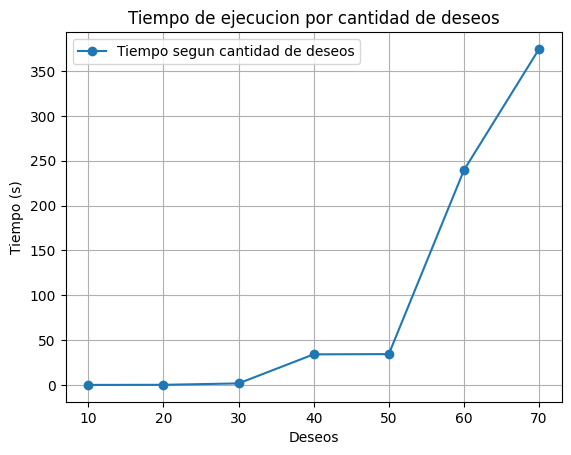

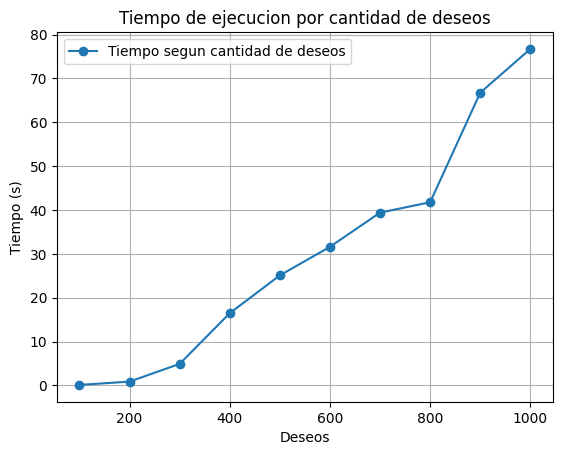

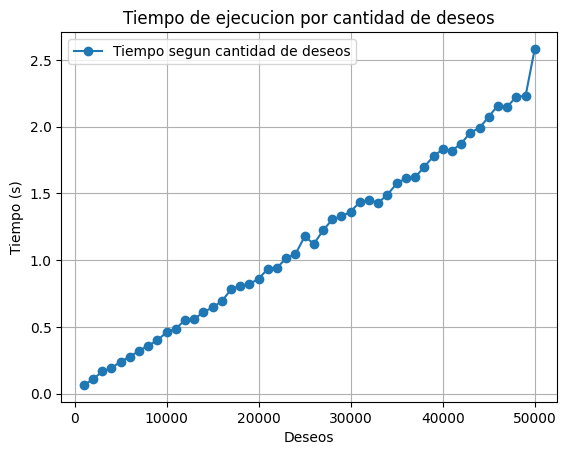

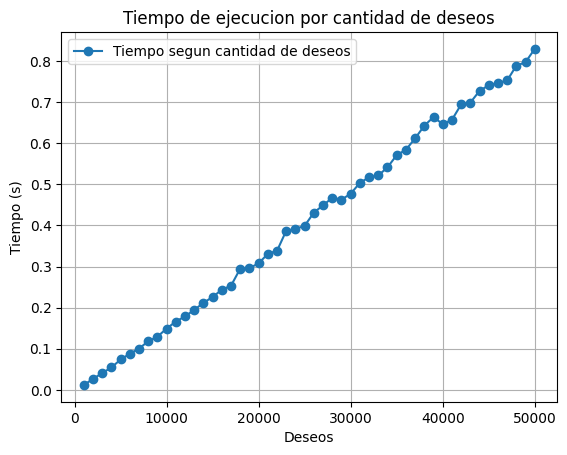

In [12]:
plot_resultados(soluciones_backtracking)
plot_resultados(soluciones_programacion_lineal)
plot_resultados(soluciones_aproximacion_bilardo)
plot_resultados(soluciones_greedy)

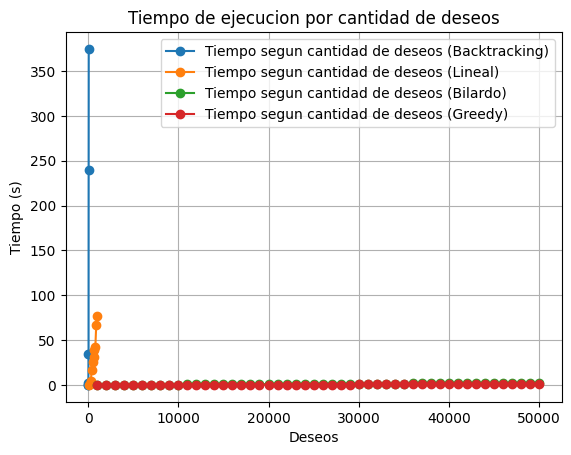

In [13]:
deseos_backtracking = [resultado[0] for resultado in soluciones_backtracking]
tiempos_backtracking = [resultado[1] for resultado in soluciones_backtracking]

deseos_programacion_lineal = [resultado[0] for resultado in soluciones_programacion_lineal]
tiempos_programacion_lineal = [resultado[1] for resultado in soluciones_programacion_lineal]

deseos_aproximacion_bilardo = [resultado[0] for resultado in soluciones_aproximacion_bilardo]
tiempos_aproximacion_bilardo = [resultado[1] for resultado in soluciones_aproximacion_bilardo]

deseos_greedy = [resultado[0] for resultado in soluciones_greedy]
tiempos_greedy = [resultado[1] for resultado in soluciones_greedy]
    
plt.plot(deseos_backtracking, tiempos_backtracking, label= "Tiempo segun cantidad de deseos (Backtracking)",  marker='o', linestyle='-')
plt.plot(deseos_programacion_lineal, tiempos_programacion_lineal, label= "Tiempo segun cantidad de deseos (Lineal)",  marker='o', linestyle='-')
plt.plot(deseos_aproximacion_bilardo, tiempos_aproximacion_bilardo, label= "Tiempo segun cantidad de deseos (Bilardo)",  marker='o', linestyle='-')
plt.plot(deseos_greedy, tiempos_greedy, label= "Tiempo segun cantidad de deseos (Greedy)",  marker='o', linestyle='-')
plt.xlabel('Deseos')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecucion por cantidad de deseos')
plt.grid(True)
plt.legend()

plt.show()